2020 Mar
<h1><center>Gradient Descent Methods</center></h1>

# 1. Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 4*X + np.random.randn(100,1) + 5

Text(0, 0.5, 'y')

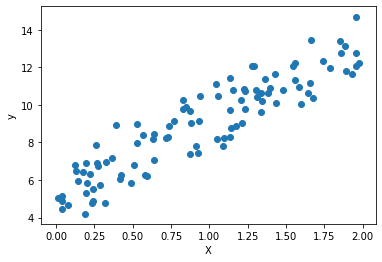

In [3]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

# 2. Define Cost Function

In [4]:
def func_cost(X, y, a):
    n = len(y)
    y_p = np.dot(X, a)
    c = 1/n * np.sum(np.square(y_p-y))
    return c

# 3. Gradient Descents
## 3.1 Batch gradient descent

Batch Gradient Descent calculates sum of costs of all samples in order to update the parameters. Thus, the downside of this method is that it requires huge memory and calculations compared to other methods. The good thing is that it is unlikely that it does not reach the local minima as long as it exists.

In [26]:
def batch_gd(X,y,a = 0,learning_rate = 0.01, iterations = 100):
    n = len(y)
    cost_record = []

    for i in range(iterations):
        y_p = np.dot(X, a)
        a = a - 1/(2*n)*learning_rate*(X.T.dot((y_p - y)))
        cost_record.append(func_cost(X,y,a))
    return a, cost_record

In [27]:
a, cost = batch_gd(X, y)

Text(0, 0.5, 'cost')

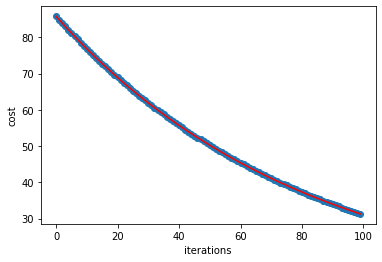

In [30]:
plt.scatter(np.arange(100), cost)
plt.plot(np.arange(100), cost, color = 'red')
plt.xlabel("iterations")
plt.ylabel("cost")

## 3.2 Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is more commonly used method. It only takes one sample to calculate the cost per iteration. Thus, it uses less memory and less calculations per update compared to Batch Gradient Descent. The disadvantage of this method is that it could keep oscillating forever and never reaches the ciritical point. However, it is shown that small learning rate can prevent this pitfall. There are many advanced techniques derived from SGD such as Adam 

In [32]:
def sgd(X, y, a = 0, learning_rate = 0.01, iterations = 100):
    n = len(y)
    cost_record = []
    
    for i in range(iterations):
        c = 0
        for i in range(n):
            rand_int = np.random.randint(0,n)
            X_i = X[rand_int, :].reshape(1, X.shape[1])
            y_i = y[rand_int].reshape(1,1)
            y_pred_i = np.dot(X_i, a)

            a = a-1/n*learning_rate*(X_i.T.dot((y_pred_i - y_i)))
            c += func_cost(X_i, y_i, a)
        cost_record.append(c)
    return a, cost_record

In [33]:
a, cost = sgd(X, y)

Text(0, 0.5, 'cost')

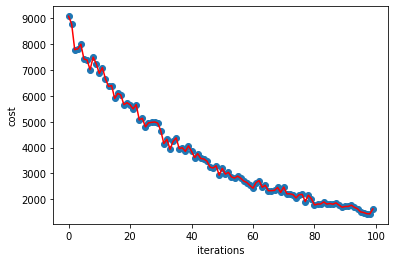

In [34]:
plt.scatter(np.arange(100), cost)
plt.plot(np.arange(100), cost, color = 'red')
plt.xlabel("iterations")
plt.ylabel("cost")